In [8]:
# =========================================================
# 1. Importación de librerías
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, balanced_accuracy_score
from sklearn.utils import resample

# Modelos clásicos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Guardado de modelo
import joblib

In [11]:
# =========================================================
# 2. Cargar datos
# =========================================================
train = pd.read_csv("train.csv")
test = pd.read_csv("eval.csv")   # Dataset de prueba (NO usar para entrenar)

print("Shape train:", train.shape)
print("Shape test:", test.shape)
train.head()



Shape train: (31403, 2)
Shape test: (3490, 2)


,text,decade
0,\nHonorarias ¡jubiladas. 57 \ndit.ad Pontem de...,164
1,"gone. Sus amigos , sus clientes, todo \ncuanto...",182
2,"Prefosen quemanera,e per qualesfolpechas deuan...",157
3,Caistro el M a y o r a i .] Del ape...,163
4,\nlos que panden macho ; y \notros en l...,166


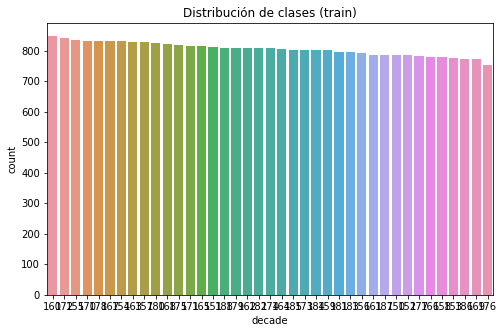

In [13]:
# =========================================================
# 3. Análisis exploratorio
# =========================================================
plt.figure(figsize=(8,5))
sns.countplot(x="decade", data=train, order=train["decade"].value_counts().index)
plt.title("Distribución de clases (train)")
plt.show()



In [20]:
# =========================================================
# 4. Preprocesamiento
# =========================================================
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"[^a-záéíóúüñ\s]", "", text)  # solo letras
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

train["texto_limpio"] = train["text"].astype(str).apply(limpiar_texto)
test["texto_limpio"]  = test["text"].astype(str).apply(limpiar_texto)



[nltk_data] Downloading package stopwords to /home/opc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/opc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/opc/nltk_data...


In [22]:
# =========================================================
# 5. Balanceo de clases
# =========================================================
train_bal = pd.DataFrame()
max_count = train["decade"].value_counts().max()

for label, group in train.groupby("decade"):
    group_bal = resample(group, 
                         replace=True, 
                         n_samples=max_count, 
                         random_state=42)
    train_bal = pd.concat([train_bal, group_bal])

print("Distribución después del balanceo:")
print(train_bal["decade"].value_counts())

Distribución después del balanceo:
159    848
169    848
176    848
175    848
174    848
173    848
172    848
171    848
170    848
168    848
178    848
167    848
166    848
165    848
164    848
163    848
162    848
161    848
177    848
179    848
158    848
185    848
157    848
188    848
156    848
187    848
155    848
186    848
154    848
153    848
180    848
184    848
152    848
183    848
151    848
182    848
150    848
181    848
160    848
Name: decade, dtype: int64


In [24]:
# =========================================================
# 6. Representación (TF-IDF)
# =========================================================
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_bal["texto_limpio"])
y = train_bal["decade"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Entrenando LogisticRegression...
Mejores parámetros: {'C': 10}
              precision    recall  f1-score   support

         150       0.86      0.81      0.83       170
         151       0.68      0.68      0.68       170
         152       0.78      0.77      0.78       170
         153       0.75      0.71      0.73       170
         154       0.70      0.69      0.69       169
         155       0.63      0.65      0.64       170
         156       0.66      0.65      0.65       169
         157       0.56      0.50      0.53       170
         158       0.61      0.66      0.63       169
         159       0.56      0.59      0.58       170
         160       0.58      0.66      0.62       170
         161       0.61      0.60      0.61       170
         162       0.63      0.61      0.62       169
         163       0.63      0.62      0.63       169
         164       0.55      0.53      0.54       170
         165       0.61      0.54      0.57       169
         166     

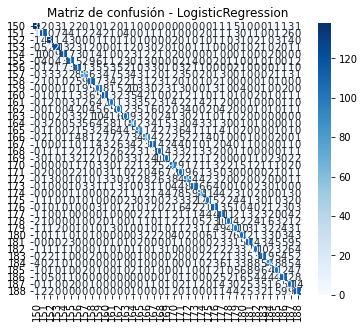


Entrenando NaiveBayes...
Mejores parámetros: {'alpha': 0.5}
              precision    recall  f1-score   support

         150       0.60      0.72      0.65       170
         151       0.40      0.60      0.48       170
         152       0.63      0.62      0.63       170
         153       0.34      0.65      0.45       170
         154       0.40      0.57      0.47       169
         155       0.47      0.39      0.43       170
         156       0.63      0.51      0.56       169
         157       0.39      0.36      0.37       170
         158       0.38      0.48      0.42       169
         159       0.31      0.51      0.39       170
         160       0.49      0.44      0.46       170
         161       0.43      0.44      0.44       170
         162       0.41      0.44      0.42       169
         163       0.47      0.40      0.43       169
         164       0.43      0.45      0.44       170
         165       0.45      0.34      0.39       169
         166       0

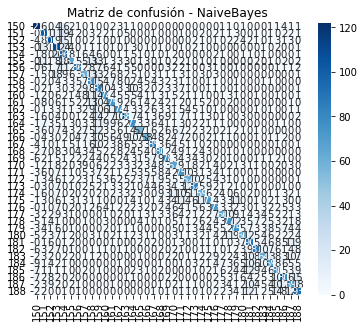


Entrenando RandomForest...
Mejores parámetros: {'max_depth': None, 'n_estimators': 300}
              precision    recall  f1-score   support

         150       0.68      0.84      0.75       170
         151       0.54      0.71      0.61       170
         152       0.68      0.76      0.72       170
         153       0.62      0.74      0.68       170
         154       0.61      0.73      0.66       169
         155       0.74      0.60      0.66       170
         156       0.65      0.67      0.66       169
         157       0.58      0.52      0.55       170
         158       0.58      0.67      0.62       169
         159       0.64      0.64      0.64       170
         160       0.66      0.67      0.66       170
         161       0.60      0.64      0.62       170
         162       0.67      0.64      0.66       169
         163       0.65      0.63      0.64       169
         164       0.64      0.58      0.60       170
         165       0.64      0.59      0.61   

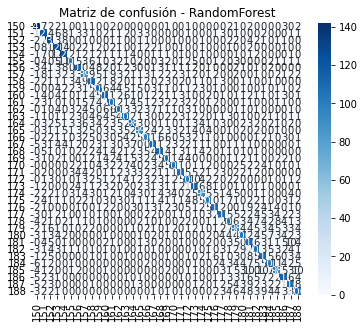


Entrenando SVM...
Mejores parámetros: {'C': 1}
              precision    recall  f1-score   support

         150       0.81      0.82      0.81       170
         151       0.57      0.70      0.63       170
         152       0.75      0.79      0.77       170
         153       0.66      0.70      0.68       170
         154       0.67      0.66      0.67       169
         155       0.63      0.62      0.62       170
         156       0.65      0.66      0.65       169
         157       0.54      0.51      0.52       170
         158       0.58      0.63      0.60       169
         159       0.55      0.60      0.57       170
         160       0.59      0.64      0.61       170
         161       0.61      0.60      0.61       170
         162       0.63      0.60      0.61       169
         163       0.61      0.59      0.60       169
         164       0.55      0.54      0.54       170
         165       0.56      0.52      0.54       169
         166       0.57      0.53

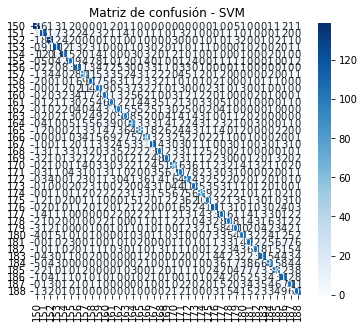

In [25]:
# =========================================================
# 7. Entrenamiento y comparación de modelos
# =========================================================
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "NaiveBayes": MultinomialNB(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": LinearSVC(random_state=42)
}

param_grid = {
    "LogisticRegression": {"C": [0.1, 1, 10]},
    "NaiveBayes": {"alpha": [0.5, 1.0]},
    "RandomForest": {"n_estimators": [100, 300], "max_depth": [10, None]},
    "SVM": {"C": [0.1, 1, 10]}
}

resultados = {}
mejor_modelo = None
mejor_f1 = 0

for nombre, modelo in modelos.items():
    print(f"\nEntrenando {nombre}...")
    grid = GridSearchCV(modelo, param_grid[nombre], cv=2, scoring="f1_macro", n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average="macro")
    bal_acc = balanced_accuracy_score(y_val, y_pred)

    resultados[nombre] = {
        "Mejores params": grid.best_params_,
        "Accuracy": acc,
        "F1-macro": f1,
        "BalancedAcc": bal_acc
    }

    print("Mejores parámetros:", grid.best_params_)
    print(classification_report(y_val, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred, labels=np.unique(y_val))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_val),
                yticklabels=np.unique(y_val))
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

    # Guardar mejor modelo
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_modelo = grid.best_estimator_

                                              Mejores params  Accuracy  \
LogisticRegression                                 {'C': 10}  0.628118   
NaiveBayes                                    {'alpha': 0.5}  0.460166   
RandomForest        {'max_depth': None, 'n_estimators': 300}  0.642177   
SVM                                                 {'C': 1}  0.617989   

                    F1-macro BalancedAcc  
LogisticRegression  0.628074    0.628112  
NaiveBayes          0.459706    0.460094  
RandomForest        0.641995    0.642179  
SVM                 0.617509    0.617982  


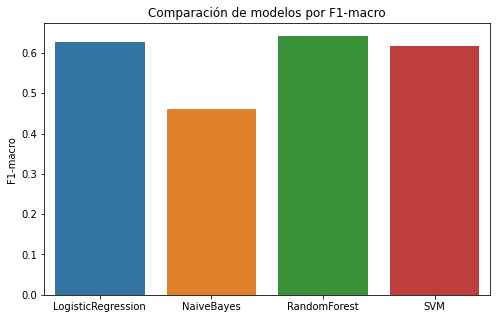

In [26]:
# =========================================================
# 8. Resultados comparativos
# =========================================================
res_df = pd.DataFrame(resultados).T
print(res_df)

plt.figure(figsize=(8,5))
sns.barplot(x=res_df.index, y="F1-macro", data=res_df.reset_index())
plt.title("Comparación de modelos por F1-macro")
plt.show()

In [27]:
# =========================================================
# 9. Exportar mejor modelo
# =========================================================
joblib.dump(mejor_modelo, "mejor_modelo.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("Mejor modelo guardado:", mejor_modelo)


Mejor modelo guardado: RandomForestClassifier(n_estimators=300, random_state=42)


In [28]:
# =========================================================
# 10. Predicciones en dataset de prueba (eval.csv)
# =========================================================
X_test = vectorizer.transform(test["texto_limpio"])
y_test_pred = mejor_modelo.predict(X_test)

submission = pd.DataFrame({
    "id": test["id"],
    "decada": y_test_pred
})
submission.to_csv("submission.csv", index=False)

print("Archivo submission.csv generado correctamente")

Archivo submission.csv generado correctamente
